In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report



In [10]:
url_df = pd.read_csv('/Users/utkarshkharb/Desktop/Malicious URLs.csv')



In [12]:
url_df

,URLs,Class
0,freebase.com/view/en/bob_sirois,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,ussoccer.com/News/Federation-Services/2009/06/...,good
...,...,...
420459,ourorigins.org/genealogielistfirstname.aspx?an...,good
420460,simira.co.id/cifk/live.com/Account_Verified.htm,bad
420461,kstatesports.com/sports/w-baskbl/spec-rel/ksu-...,good
420462,vh1.com/video/living-colour/9128/cult-of-perso...,good


In [19]:
# good stands for a benign url while bad for malicious url

In [13]:
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420464 entries, 0 to 420463
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URLs    420464 non-null  object
 1   Class   420464 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [14]:
url_df.describe()

,URLs,Class
count,420464,420464
unique,411247,2
top,103.234.36.75/rd927.exe,good
freq,27,344821


In [17]:
test_percentage = .3
train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)

labels = train_df['Class']
test_labels = test_df['Class']


In [18]:
train_df

,URLs,Class
95566,en.wikipedia.org/wiki/Ash_Wednesday_(film),good
227724,checkoutmycards.com/Players/Baseball/O,good
214714,hotsprings.org/,good
177373,en.wikipedia.org/wiki/Saint-Michel_(Montreal_M...,good
359072,armchairgm.wikia.com/1966_NCAA_Men%27s_Divisio...,good
...,...,...
259178,ech.case.edu/ech-cgi/article.pl?id=RNCO1,good
365838,mysanantonio.com/sports/college_sports/big_12/...,good
131932,princegeorgecitizen.com/article/20110505/PRINC...,good
146867,photography-now.com/artists/K06981.html,good


Size of the data: 
Training Samples: 294324
Testing Samples: 126140


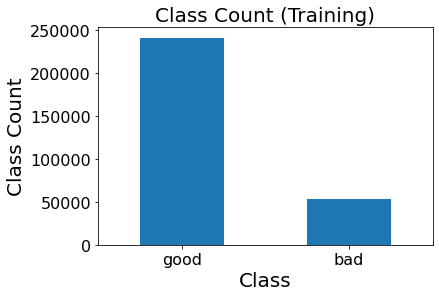

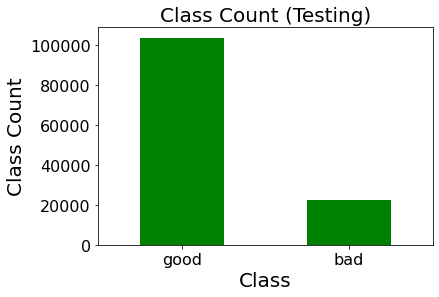

In [20]:
print("Size of the data: ")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

In [23]:
# Hence we have more no of good urls than bad

In [24]:
# The classes here are somewhat imbalanced. This will be addressed later.

In [22]:
# Tokenization : Create our tokenizer by splitting URLs into their domains, subdomains, directories, files, and extensions.
# Rules for Tokenization:

In [25]:
def tokenizer(url):
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)
  
  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')
      
      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
        
      if "www" in dot_split:
        dot_split.remove("www")
      
      tokens += dot_split
      
  return tokens

In [30]:
test_url = train_df['URLs'][259178]

In [31]:
print(test_url)
print(tokenizer(test_url))

ech.case.edu/ech-cgi/article.pl?id=RNCO1
['ech.case.edu', 'ech', 'cgi', 'article.pl?id=RNCO1', 'ech', 'case', 'edu', 'article', 'pl?id=RNCO1']


In [32]:
test_url = train_df['URLs'][4]
print(test_url)

# Tokenize test URL
print("\n- Tokenized Output -\n")
tokenized_url = tokenizer(test_url)
print(tokenized_url)

ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx

- Tokenized Output -

['ussoccer.com', 'News', 'Federation', 'Services', '2009', '06', 'University', 'Of', 'Miami', 'President', 'Donna', 'E', 'Shalala', 'Joins', 'Team', 'To', 'Bring', 'FIFA', 'World', 'Cup', 'To', 'United', 'States', 'In.aspx', 'ussoccer', 'In', 'aspx']


In [33]:
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['URLs'])


tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['URLs'])


In [34]:

for i in list(dict.fromkeys(tokenized_url)):
  print("{} - {}".format(tokenized_url.count(i), i))

1 - ussoccer.com
1 - News
1 - Federation
1 - Services
1 - 2009
1 - 06
1 - University
1 - Of
1 - Miami
1 - President
1 - Donna
1 - E
1 - Shalala
1 - Joins
1 - Team
2 - To
1 - Bring
1 - FIFA
1 - World
1 - Cup
1 - United
1 - States
1 - In.aspx
1 - ussoccer
1 - In
1 - aspx


In [35]:
example_cVec = CountVectorizer(tokenizer=tokenizer)
example_X = example_cVec.fit_transform([test_url])

print(example_X)

example_tVec = TfidfVectorizer(tokenizer=tokenizer)
example_X = example_tVec.fit_transform([test_url])

print(example_X)

  (0, 24)	1
  (0, 13)	1
  (0, 7)	1
  (0, 16)	1
  (0, 1)	1
  (0, 0)	1
  (0, 22)	1
  (0, 14)	1
  (0, 12)	1
  (0, 15)	1
  (0, 5)	1
  (0, 6)	1
  (0, 17)	1
  (0, 11)	1
  (0, 19)	1
  (0, 20)	2
  (0, 3)	1
  (0, 8)	1
  (0, 25)	1
  (0, 4)	1
  (0, 21)	1
  (0, 18)	1
  (0, 10)	1
  (0, 23)	1
  (0, 9)	1
  (0, 2)	1
  (0, 2)	0.18569533817705186
  (0, 9)	0.18569533817705186
  (0, 23)	0.18569533817705186
  (0, 10)	0.18569533817705186
  (0, 18)	0.18569533817705186
  (0, 21)	0.18569533817705186
  (0, 4)	0.18569533817705186
  (0, 25)	0.18569533817705186
  (0, 8)	0.18569533817705186
  (0, 3)	0.18569533817705186
  (0, 20)	0.3713906763541037
  (0, 19)	0.18569533817705186
  (0, 11)	0.18569533817705186
  (0, 17)	0.18569533817705186
  (0, 6)	0.18569533817705186
  (0, 5)	0.18569533817705186
  (0, 15)	0.18569533817705186
  (0, 12)	0.18569533817705186
  (0, 14)	0.18569533817705186
  (0, 22)	0.18569533817705186
  (0, 0)	0.18569533817705186
  (0, 1)	0.18569533817705186
  (0, 16)	0.18569533817705186
  (0, 7)	0.1856953

In [36]:

test_count_X = cVec.transform(test_df['URLs'])

test_tfidf_X = tVec.transform(test_df['URLs'])


In [37]:
def generate_report(cmatrix, score, creport):
  
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()
  


              precision    recall  f1-score   support

         bad       0.99      0.81      0.89     22561
        good       0.96      1.00      0.98    103579

    accuracy                           0.97    126140
   macro avg       0.98      0.91      0.94    126140
weighted avg       0.97      0.97      0.96    126140



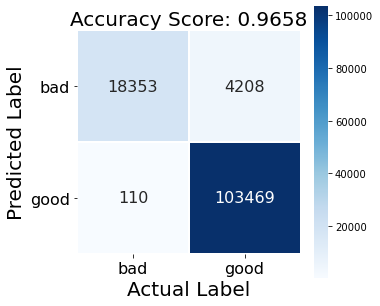

In [38]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix( test_labels,predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report( test_labels,predictions_mnb_tfidf)

generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)

              precision    recall  f1-score   support

         bad       0.97      0.89      0.93     22561
        good       0.98      0.99      0.99    103579

    accuracy                           0.98    126140
   macro avg       0.98      0.94      0.96    126140
weighted avg       0.98      0.98      0.98    126140



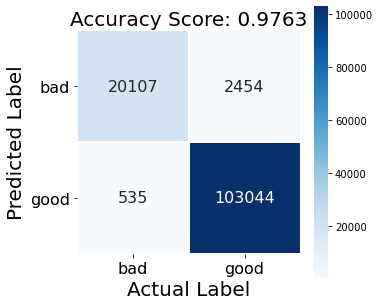

In [39]:
# Multinomial Naive Bayesian with Count Vectorizer

# Train the model
mnb_count = MultinomialNB()
mnb_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix( test_labels, predictions_mnb_count)
creport_mnb_count = classification_report( test_labels, predictions_mnb_count)

generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)

/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         bad       0.96      0.83      0.89     22561
        good       0.96      0.99      0.98    103579

    accuracy                           0.96    126140
   macro avg       0.96      0.91      0.93    126140
weighted avg       0.96      0.96      0.96    126140



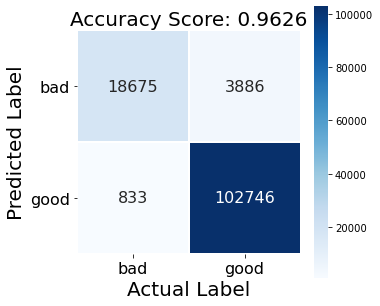

In [40]:
# Logistic Regression with TF-IDF

# Train the model
lgs_tfidf = LogisticRegression(solver='lbfgs')
lgs_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_tfidf = lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf = lgs_tfidf.predict(test_tfidf_X)
cmatrix_lgs_tfidf = confusion_matrix(test_labels, predictions_lgs_tfidf)
creport_lgs_tfidf = classification_report(test_labels,predictions_lgs_tfidf)

generate_report(cmatrix_lgs_tfidf, score_lgs_tfidf, creport_lgs_tfidf)

/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         bad       0.97      0.87      0.92     22561
        good       0.97      0.99      0.98    103579

    accuracy                           0.97    126140
   macro avg       0.97      0.93      0.95    126140
weighted avg       0.97      0.97      0.97    126140



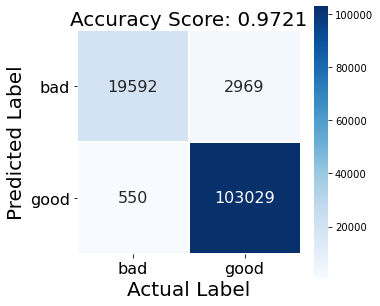

In [41]:
# Logistic Regression with Count Vectorizer

# Train the model
lgs_count = LogisticRegression(solver='lbfgs')
lgs_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_count = lgs_count.score(test_count_X, test_labels)
predictions_lgs_count = lgs_count.predict(test_count_X)
cmatrix_lgs_count = confusion_matrix(test_labels, predictions_lgs_count)
creport_lgs_count = classification_report(test_labels,predictions_lgs_count)

generate_report(cmatrix_lgs_count, score_lgs_count, creport_lgs_count)

In [42]:
# adjusting the hyperparameters

              precision    recall  f1-score   support

         bad       0.98      0.91      0.94     22561
        good       0.98      1.00      0.99    103579

    accuracy                           0.98    126140
   macro avg       0.98      0.95      0.96    126140
weighted avg       0.98      0.98      0.98    126140



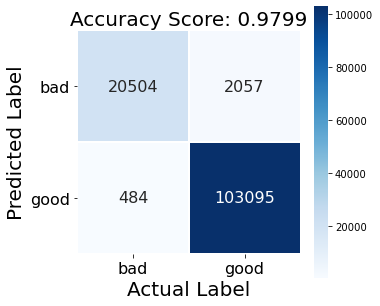

In [43]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
mnb_tfidf = MultinomialNB(alpha=0.1)
mnb_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix( test_labels,predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report( test_labels,predictions_mnb_tfidf)

generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)

              precision    recall  f1-score   support

         bad       0.96      0.92      0.94     22561
        good       0.98      0.99      0.99    103579

    accuracy                           0.98    126140
   macro avg       0.97      0.95      0.96    126140
weighted avg       0.98      0.98      0.98    126140



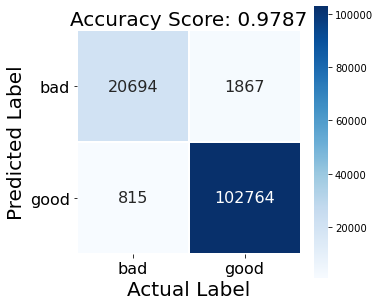

In [45]:
# Multinomial Naive Bayesian with Count Vectorizer

# Train the model
mnb_count = MultinomialNB(alpha=0.1)
mnb_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix( test_labels, predictions_mnb_count)
creport_mnb_count = classification_report( test_labels, predictions_mnb_count)

generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)

In [46]:
# Hence Multinomial Naive Bayes with Tfidf with alpha=0.1 is the best model we have made

In [48]:
# The recall and precision in the models is fairly good, which means that having unbalanced classes is having no effect on the model. I think this is because in nlp we are measuring the impact of words in the corpus and not just of singular rigid instances. 